# INPUT & DATA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

In [ ]:
# Read file
df = pd.read_csv('/data/diabetes.csv')

# Exploratory Data Analysis

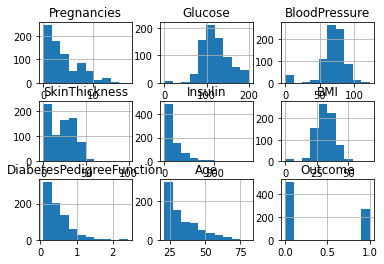

In [ ]:
# Histogram to explore the distribution of each feature
df.hist()
plt.show()

**- `Pregnancies`** The data skews to the right with some outliers (more than 15)

**- `Glucose`, `BloodPressure` & `BMI`:** Follow the normal distribution. However, the data observes some values of 0s, which is logically abnormal. These should be considered as non or missing values.*italicized text*

In [ ]:
# The difference between output values on each feature for FEATURE SELECTION

# create a subplot of 3 x 3
plt.subplots(3,3,figsize=(15,15))

# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'-',  
    'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'--', 
    'color':'black', 'label':"Diabetes"})
    ax.set_title(col)

# Hide the 9th subplot (bottom right) since there are only 8 plots
plt.subplot(3,3,9).set_visible(False)

plt.show()

- `Glucose`, `Age` variables are strong predictors for Diabetes vs Non-diabetes
- `BMI` variables are medium predictors
- `BloodPressure` & `SkinThickness` are poor predictors

# Data Preprocessing

In [ ]:
# Handling missing values
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [ ]:
# Leverage domain knowledge to handle missing values
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Glucose, BloodPressure, SkinThickness, Insulin & BMI all have min value at 0, which is logically unrealistic. 

In [ ]:
print("Number of rows with 0 values:")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]
  if col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    print(f'{col}: {missing_rows}, take {round((missing_rows/len(df)),2)*100}%')

Number of rows with 0 values:
Glucose: 5, take 1.0%
BloodPressure: 35, take 5.0%
SkinThickness: 227, take 30.0%
Insulin: 374, take 49.0%
BMI: 11, take 1.0%


Now, we have to handle these 0 values. There are 3 ways to do so:
- Remove the rows
- Replace by mean, mode value
- Using a specific model only to predict this value based on other fields.

As nearly half of Insulin values are invalid, we can not use the method 1. Plus, these values are in continous columns, means option 3 is not the deal. Let's use method 2.

In [ ]:
# Replace 0 values with NaN so pandas can easy figure out later

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
  df[col] = df[col].replace(0, np.nan)

In [ ]:
# Let's recheck if there are 0 values in these columns
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]
  if col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    print(f'{col}: {missing_rows}, take {round((missing_rows/len(df)),2)*100}%')

Glucose: 0, take 0.0%
BloodPressure: 0, take 0.0%
SkinThickness: 0, take 0.0%
Insulin: 0, take 0.0%
BMI: 0, take 0.0%


In [ ]:
df['Glucose'].mean()

121.6867627785059

In [ ]:
df.loc[df['Glucose'] != np.nan, 'Glucose'].mean()

121.6867627785059

In [ ]:
# Replace NaN by the mean of column USING `fillna`
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
  df[col] = df[col].fillna(df[col].mean())

In [ ]:
# Let's recheck with describe()
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Standardization

In [ ]:
df_copy = df.copy()

1. Using StandardScale: bring mean to 0 and standard deviation to 1

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_1 = scaler.fit_transform(df)
df_scaled_1 = pd.DataFrame(df_scaled_1, columns=df.columns)
df_scaled_1['Outcome'] = df['Outcome']

2. Using min-max scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled_2 = scaler.fit_transform(df)
df_scaled_2 = pd.DataFrame(df_scaled_2, columns=df.columns)


In [ ]:
dict_df_scales = {'Standard':df_scaled_1, 'min max': df_scaled_2}

# Create Model

In [ ]:
def create_model(units):

  # Create a sequential
  model = Sequential()

  # Add the first hidden layer
  model.add(Dense(int(units), activation='relu', input_dim=8))

  # Add the 2nd hidden layer
  model.add(Dense(int(units/2), activation='relu'))

  # Add the output layer
  model.add(Dense(1, activation='sigmoid'))

  # Compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

# Split data and train

In [ ]:
results = {}

for dataset in dict_df_scales:
  
  # Evaluation
  eval = []

  df = dict_df_scales[dataset]
  # df = df_scaled_2

  # Create X contains all features
  X = df.loc[:, df.columns != 'Outcome']
  # Create y contains output values
  y = df.loc[:, 'Outcome']

  # Split to train & test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # Split to train & validation:
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

  # Create model
  model = create_model(32)

  # Training
  model.fit(X_train, y_train, epochs = 200)

  # Accuracy
  scores = model.evaluate(X_train, y_train)
  eval.append({'Training accuracy':round(scores[1]*100,2)})

  scores = model.evaluate(X_test, y_test)
  eval.append({'Testing accuracy':round(scores[1]*100,2)})

  # y_predicted
  y_predicted = model.predict()

  results[dataset] = eval


In [ ]:
results

{'Standard': [{'Training accuracy': 80.65}, {'Testing accuracy': 81.17}],
 'min max': [{'Training accuracy': 79.63}, {'Testing accuracy': 77.27}]}

# Evaluation


CONFUSION MATRIX:

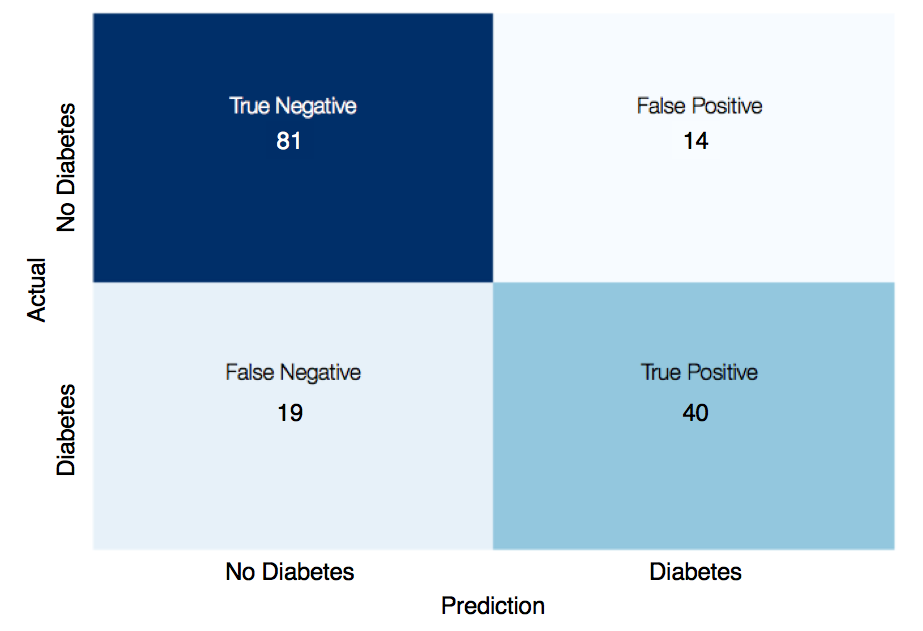

A false negative is more damaging than a false positive

ROC CURVE:

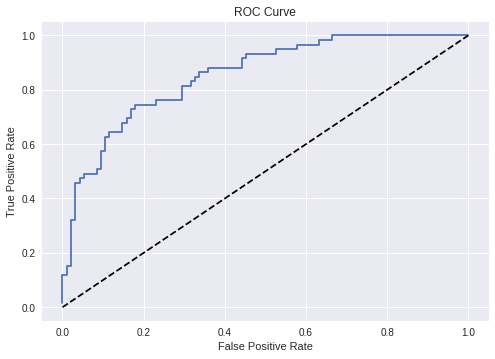